# HW 7 - Tim Demetriades
10/8/2021

### 1. Below is the architecture of the residual network (ResNet). 
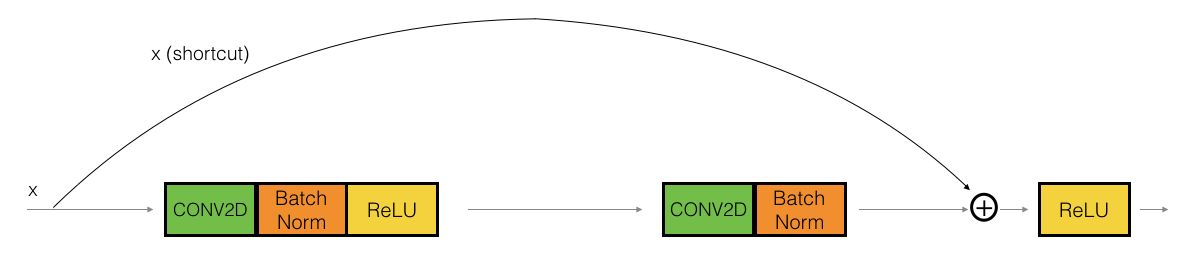

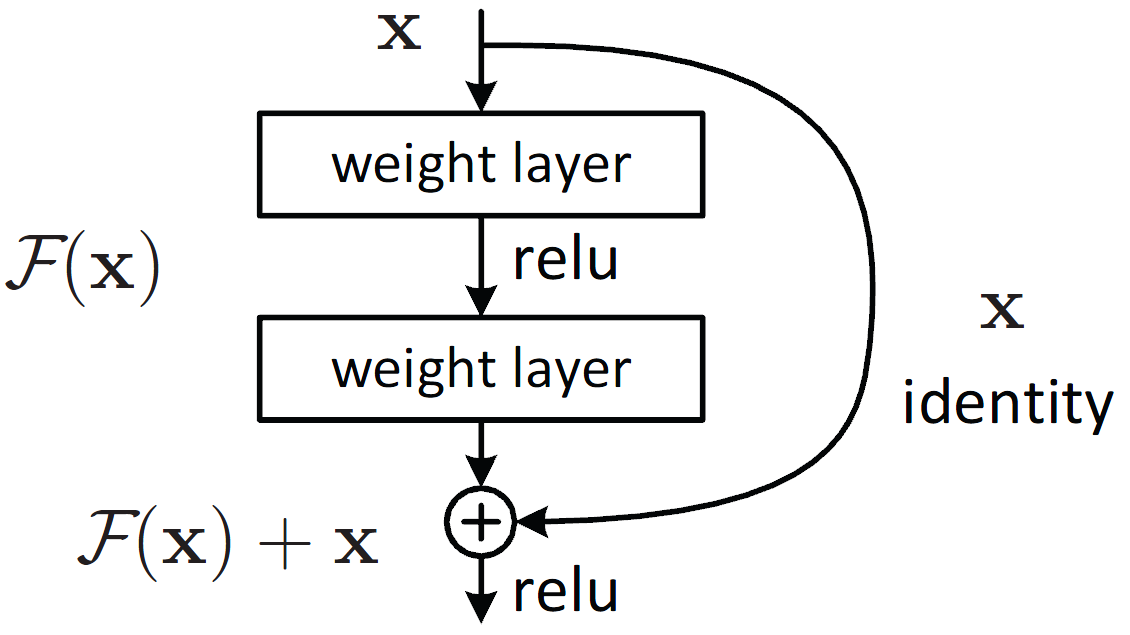

### 2. Use below code scripts as the beginning of your own ResNet: 

In [1]:
# Import cifar image dataset from keras
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [2]:
print('Train Samples: ', x_train.shape, y_train.shape)
print('Test Samples: ', x_test.shape, y_test.shape)

Train Samples:  (50000, 32, 32, 3) (50000, 1)
Test Samples:  (10000, 32, 32, 3) (10000, 1)


In [37]:
# Import Modules

# Keras
from keras.models import Model
from tensorflow.keras.layers import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, ZeroPadding2D, Add
from keras.layers.advanced_activations import LeakyReLU
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.engine.input_layer import Input
from keras.initializers import glorot_uniform

# Others
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# Set the number of classes and create a list of them
NUM_CLASSES = 10
cifar10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

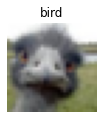

In [17]:
# Show random image from training data
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))
for i in range(cols):
  for j in range(rows):
    random_index = np.random.randint(0, len(y_train))
    ax = fig.add_subplot(rows, cols, i * rows + j + 1)
    ax.grid('off')
    ax.axis('off')
    ax.imshow(x_train[random_index, :])
    ax.set_title(cifar10_classes[y_train[random_index, 0]])
    plt.show()

In [25]:
# Change from into to float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [29]:
# Normalize
x_train /= 255
x_test /= 255

In [31]:
# Change labels from arrays to binary matrices
y_train = np_utils.to_categorical(y_train, len(cifar10_classes))
y_test = np_utils.to_categorical(y_test, len(cifar10_classes))

In [33]:
# Split training data into validation for first 10000 and traininig for the other 40000
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [35]:
# Create generators
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3, height_shift_range=0.08, zoom_range=0.08)
val_gen = ImageDataGenerator()
# Generates batches of augmented data
train_generator = gen.flow(partial_x_train, partial_y_train, batch_size=64)
val_generator = val_gen.flow(x_val, y_val, batch_size=64)

In [38]:
# Start Network

# Stage 1
x_input = Input((32, 32, 3))
x = ZeroPadding2D(padding=(3, 3), data_format=None)(x_input)    # takes in x_input as input to this layer
x = Conv2D(64, (7, 7), strides= (2, 2), name = 'conv1', kernel_initializer=glorot_uniform(seed=0))(x)
x = BatchNormalization(axis=3, name='bn_conv1')(x)
x = Activation('relu')(x)
x = MaxPooling2D((3, 3), strides=(2, 2))(x)

In [39]:
# Stage 2 - ResNet
x_shortcut = x    # save the input value as it'll be added back to the main path later

x = ZeroPadding2D(padding=(1, 1), data_format=None)(x)
x = Conv2D(64, (3, 3), strides=(1, 1), name='conv2', kernel_initializer=glorot_uniform(seed=0))(x)
x = BatchNormalization(axis=3, name='bn_conv2')(x)

# Add x_shortcut before doing final activation
x = Add()([x, x_shortcut])
x = Activation('relu')(x)

In [40]:
# Stage 3 - Fully Connected Layer
x = Flatten()(x)
x = Dense(NUM_CLASSES, activation='softmax', name='fc' + str(NUM_CLASSES), kernel_initializer=glorot_uniform(seed=0))(x)

In [41]:
# Create Model
model = Model(inputs=x_input, outputs=x, name='ResNet50')

In [42]:
# Summarize Model and List Layers
model.summary()

Model: "ResNet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 38, 38, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 16, 16, 64)   9472        zero_padding2d[0][0]             
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 16, 16, 64)   256         conv1[0][0]                      
___________________________________________________________________________________________

In [43]:
# Configure Model for Training
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [49]:
# Train Model with Training and Validation Data
model.fit_generator(train_generator, steps_per_epoch=len(partial_y_train)//64, epochs=10, validation_data=val_generator, validation_steps=len(y_val)//64)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
625/625 [==============================] - 64s 53ms/step - loss: 1.6037 - accuracy: 0.4442 - val_loss: 1.3401 - val_accuracy: 0.5229
Epoch 2/10
625/625 [==============================] - 34s 54ms/step - loss: 1.2816 - accuracy: 0.5522 - val_loss: 1.3255 - val_accuracy: 0.5341
Epoch 3/10
625/625 [==============================] - 33s 53ms/step - loss: 1.1417 - accuracy: 0.5978 - val_loss: 1.3470 - val_accuracy: 0.5383
Epoch 4/10
625/625 [==============================] - 33s 53ms/step - loss: 1.0598 - accuracy: 0.6287 - val_loss: 1.2705 - val_accuracy: 0.5704
Epoch 5/10
625/625 [==============================] - 34s 54ms/step - loss: 1.0078 - accuracy: 0.6488 - val_loss: 1.4268 - val_accuracy: 0.5625
Epoch 6/10
625/625 [==============================] - 33s 54ms/step - loss: 0.9644 - accuracy: 0.6634 - val_loss: 1.1591 - val_accuracy: 0.5960
Epoch 7/10
625/625 [==============================] - 33s 53ms/step - loss: 0.9238 - accuracy: 0.6776 - val_loss: 1.2125 - val_accuracy:

In [50]:
# Evaluate Model on Testing Data
score = model.evaluate(x_test, y_test)
print('\nTest Accuracy: ', score[1])

313/313 [==============================] - 2s 5ms/step - loss: 1.0349 - accuracy: 0.6614

Test Accuracy:  0.6614000201225281


As can be seen above, the model obtained a **testing loss of around 1.03** and **testing accuracy of around 66%**. While not super impressive, these values are relatively good given the number of epoch used. Of course, more epochs can be added and hyperparameters can be adjusted to hopefully give better results. Also, more layers could be added to the model, as ResNets solve the vanishing gradient problem and therefore can handle many layers to improve the model performance.